In [1]:
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
import ipywidgets
import geocoder
import geopy

%matplotlib inline

# Reading in data 

In [2]:
winter = gpd.read_file('../data/winterstock.geojson')
tailwater = gpd.read_file('../data/tailwaterstock.geojson')
spring = gpd.read_file('../data/springstreamstock.geojson')
fishing = gpd.read_file('../data/fishingaccess.geojson')
marina = gpd.read_file('../data/marinaacces.geojson')
boat = gpd.read_file('../data/boatlaunchaccess.geojson')
reservoir = gpd.read_file('../data/reservoir.geojson')

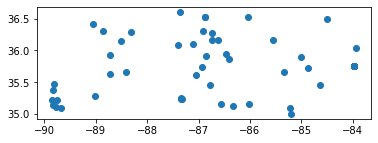

In [3]:
winter.plot();

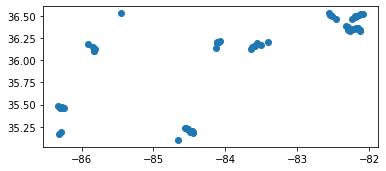

In [4]:
tailwater.plot();

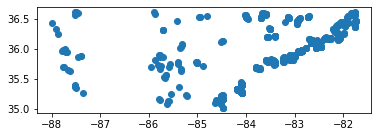

In [5]:
spring.plot();

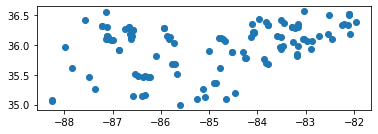

In [6]:
fishing.plot();

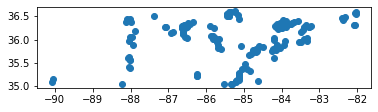

In [7]:
marina.plot();

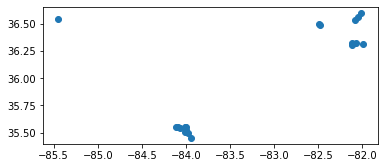

In [8]:
reservoir.plot();

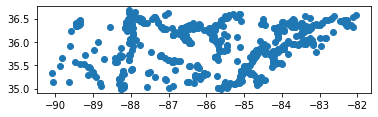

In [9]:
boat.plot();

# Cleaning data so I can merge it all together

In [11]:
results = [winter, spring, tailwater, reservoir]

In [12]:
restocking = pd.concat(results)

In [13]:
reservoir.shape

(19, 34)

<AxesSubplot:>

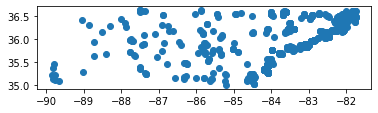

In [14]:
restocking.plot()

In [15]:
restocking.StockingProgram.value_counts()

Spring Streams    684
Tailwater          65
Winter             51
Reservoir          21
Name: StockingProgram, dtype: int64

In [16]:
pd.options.display.max_columns = None
fishing.head()

,OBJECTID,Access_Num,Latitude,Longitude,Region,Area,County,Waterway,Data_Colle,Collection,Name,Alternate,Directions,Parking,Spaces,Trailer_Pa,Hours_Open,Ice,Bait,Camping,Comments,Ramps,Ramp_Struc,Lanes,Launchable,Gas,Owner,Manager,Date_Lease,Type,FourWheel,AccessFee,HandicapPark,LightedPark,OpenYearRound,ClosedMonths,HourAccess_24,SunriseSunset,ElectricHookup,WaterHookup,Restrooms,FishingPier,FishCleaning,CanoeLanding,WinterPool,CourtesyDock,MotorizedVessels,TrollingOnly,RentalOnly,RentalAvail,Lease_TWRA,IncludeWeb,created_user,created_date,last_edited_user,last_edited_date,Guide,PhotoName,geometry
0,1,317.0,35.887937,-84.523896,3,Area 32,ROANE,Watts Bar Reservoir,Matt Clarey,2016-04-25T00:00:00+00:00,Kingston Fishing Access,,None,Paved,More Than 25 Spaces,Greater than 25,Other hours,Proximity,Proximity,No,,NaN,None,None,None,None,TWRA,TWRA,,Fishing Site,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,None,None,BH01306,2016-04-25T21:14:36+00:00,19.0,None,POINT (-84.52390 35.88794)
1,2,2071.0,36.102380,-87.108890,2,Area 21,Cheatham,Harpeth River,Frank Fiss,2010-03-03T00:00:00+00:00,L.L. Burns Park,Kingston Springs Park,Off Pinnacle Road off HWY 70,Paved,More Than 25 Spaces,Greater Than 25 Spaces,Sunrise to Sunset,No,No,No,,0.0,None,0,0,No,City,City,None,Fishing Site,No,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,BH01507,2015-04-16T19:24:27+00:00,BH01306,2015-10-23T20:31:13+00:00,1011.0,None,POINT (-87.10890 36.10239)
2,3,2070.0,36.100730,-87.105730,2,Area 21,Cheatham,Harpeth River,Frank Fiss,2010-03-03T00:00:00+00:00,Kingston Springs State Park,,On Pinnacle Road off HWY 70,Gravel,More Than 25 Spaces,5-10 Spaces,24 hour access,No,No,No,,0.0,None,0,0,No,City,TDEC / Harpeth River State Park,None,Fishing Site,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,BH01507,2015-04-16T19:24:27+00:00,BH01306,2015-10-23T20:31:13+00:00,1011.0,None,POINT (-87.10574 36.10074)
3,5,2068.0,36.123820,-87.098420,2,Area 21,Cheatham,Harpeth River,Frank Fiss,2010-03-03T00:00:00+00:00,Highway 70 Access,,HWY 70 and Cedar Hill Road,Dirt,Less Than 25 Spaces,Less Than 5 spaces,24 hour access,No,No,No,,0.0,None,0,0,No,TDOT,TDEC / Harpeth River State Park,None,Fishing Site,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,Yes,BH01507,2015-04-16T19:24:27+00:00,BH01306,2015-10-23T20:31:13+00:00,1011.0,Hwy70Access.jpg,POINT (-87.09843 36.12383)
4,6,2066.0,36.135110,-87.100510,2,Area 21,Cheatham,Harpeth River,Frank Fiss,2010-03-03T00:00:00+00:00,Gossett,,Off Cedar Hill Road,Gravel,Less Than 25 Spaces,Less Than 5 spaces,Sunrise to Sunset,No,No,No,,0.0,None,0,0,No,TDEC,TDEC / Harpeth River State Park,None,Fishing Site,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,BH01507,2015-04-16T19:24:27+00:00,BH01306,2015-10-23T20:31:13+00:00,1011.0,Gossett.jpg,POINT (-87.10052 36.13512)


In [22]:
double = [boat,fishing]

In [23]:
accesses = pd.concat(double)

In [25]:
marina.MemberOnly.value_counts()

Yes    5
Name: MemberOnly, dtype: int64

In [26]:
marina.head()

,OBJECTID,Access_Num,Latitude,Longitude,Region,Area,County,Waterway,Data_Colle,Collection,Name,Alternate,Directions,Parking,Spaces,Trailer_Pa,Hours_Open,Ice,Bait,Camping,Comments,Ramps,Ramp_Struc,Lanes,Launchable,Gas,Owner,Manager,Date_Lease,Type,FourWheel,AccessFee,HandicapPark,LightedPark,OpenYearRound,ClosedMonths,HourAccess_24,SunriseSunset,ElectricHookup,WaterHookup,Restrooms,FishingPier,FishCleaning,CanoeLanding,WinterPool,CourtesyDock,MotorizedVessels,TrollingOnly,RentalOnly,RentalAvail,Lease_TWRA,IncludeWeb,created_user,created_date,last_edited_user,last_edited_date,Guide,PhotoName,MemberOnly,PumpOut,Website,geometry
0,1,102.0,36.05905,-88.01874,1,Area 12,BENTON,Kentucky Reservoir,B. Jackson,2009-06-04T00:00:00+00:00,Beaverdam Marina,,,Paved,Less Than 25 Spaces,5-10 Spaces,24 hour access,Onsite,Onsite,No,,1.0,Concrete,1,Up to 26 ft.,Onsite,Private Land,Private Land,,Marina,No,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,No,Yes,None,None,BH01306,2015-10-23T20:31:13+00:00,16,None,None,No,http://beaverdamtn.blogspot.com/,POINT (-88.01875 36.05906)
1,2,72.0,35.97061,-88.04729,1,Area 12,BENTON,Kentucky Reservoir,Kevin Hoofman,2009-06-04T00:00:00+00:00,Birdsong Marina,,,Paved,More Than 25 Spaces,More Than 25,24 hour access,Proximity,Proximity,Proximity,,1.0,Concrete,3,All Vessels,Proximity,Private Land,Private Land,,Marina,No,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,None,None,BH01306,2015-10-23T20:31:13+00:00,16,None,None,Yes,http://www.birdsong.com/,POINT (-88.04730 35.97062)
2,3,615.0,36.32880,-83.75290,4,Area 41,UNION,Norris Reservoir,Rick Roberts,2007-07-13T00:00:00+00:00,Beach Island Marina,33 Bridge Marina,1/2 mile South of HWY 33 Bridge,Gravel,More Than 25 Spaces,Greater than 25,24 hour access,Onsite,Onsite,Onsite,,1.0,Concrete,2,All Vessels,Onsite,Marina,Marina,,Marina,No,Yes,Yes,Yes,Yes,None,Yes,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,None,None,BH01306,2015-10-23T20:31:13+00:00,21,None,None,Yes,http://www.beachislandmarina.com/,POINT (-83.75290 36.32881)
3,4,609.0,36.26430,-83.88280,4,Area 41,UNION,Norris Reservoir,Rick Roberts,2007-07-13T00:00:00+00:00,Hickory Star Marina,,HWY 33 to Hickory Star Rd in Maynardville,Paved,More Than 25 Spaces,Greater than 25,24 hour access,Onsite,Onsite,Onsite,,1.0,Concrete,3,All Vessels,Onsite,Marina,Marina,,Marina,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,None,None,BH01306,2015-10-23T20:31:13+00:00,21,None,None,Yes,http://www.hickorystar.com/,POINT (-83.88280 36.26431)
4,5,1189.0,35.10437,-84.63217,3,Area 32,POLK,Parksville Reservoir,,2007-05-14T00:00:00+00:00,Lake Ocoee Marina,,,Paved,More Than 25 Spaces,5-10 Spaces,24 hour access,Onsite,Onsite,No,,1.0,Concrete,1,Up to 26ft,Onsite,USFS,Marina,,Marina,No,No,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,Yes,None,None,BH01306,2015-10-23T20:31:13+00:00,19,None,None,Yes,http://www.ocoeeinn.com/,POINT (-84.63217 35.10438)


In [27]:
accesses["MemberOnly"]= None

In [29]:
accesses["PumpOut"]= None

In [30]:
accesses["Website"]= None

In [35]:
accesses = accesses[['OBJECTID', 'Access_Num', 'Latitude', 'Longitude', 'Region', 'Area',
       'County', 'Waterway', 'Data_Colle', 'Collection', 'Name', 'Alternate',
       'Directions', 'Parking', 'Spaces', 'Trailer_Pa', 'Hours_Open', 'Ice',
       'Bait', 'Camping', 'Comments', 'Ramps', 'Ramp_Struc', 'Lanes',
       'Launchable', 'Gas', 'Owner', 'Manager', 'Date_Lease', 'Type',
       'FourWheel', 'AccessFee', 'HandicapPark', 'LightedPark',
       'OpenYearRound', 'ClosedMonths', 'HourAccess_24', 'SunriseSunset',
       'ElectricHookup', 'WaterHookup', 'Restrooms', 'FishingPier',
       'FishCleaning', 'CanoeLanding', 'WinterPool', 'CourtesyDock',
       'MotorizedVessels', 'TrollingOnly', 'RentalOnly', 'RentalAvail',
       'Lease_TWRA', 'IncludeWeb', 'created_user', 'created_date',
       'last_edited_user', 'last_edited_date', 'Guide', 'PhotoName',
       'MemberOnly', 'PumpOut', 'Website', 'geometry']]

In [37]:
triple = [accesses,marina]

In [38]:
access = pd.concat(triple)

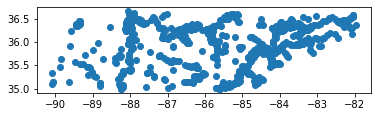

In [41]:
access.plot();

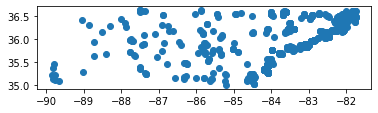

In [40]:
restocking.plot();

In [42]:
restocking.to_file("../data/tn_restock.geojson", driver='GeoJSON')

In [43]:
access.to_file("../data/tn_access.geojson", driver='GeoJSON')